## IPL in Overseas 

In [26]:
import pandas as pd
import numpy as np
df_matches = pd.read_csv("matches.csv")
df_matches.city.fillna("Dubai",inplace=True)
overseas_cities = ['Cape Town','Port Elizabeth','Durban','Centurion','East London','Johannesburg','Kimberley','Bloemfontein','Abu Dhabi','Sharjah','Dubai']


In [27]:
indian_cities = []
for value in df_matches.city.unique():
    if value not in overseas_cities:
        indian_cities.append(value)

In [28]:
#- Get Overseas Matches
df_overseas_matches = df_matches[~df_matches.city.isin(indian_cities)]

In [30]:
#- Get required columns for analysis
df_os_stats = df_overseas_matches[['season','city','team1','team2','toss_winner','toss_decision','winner','venue','win_by_runs','win_by_wickets']]

###  Overseas - Season and Winner for the IPL Scheduled 

In [31]:
df_os_stats.season.unique()

array([2009, 2014], dtype=int64)

Observations:
    
    IPL 2009 Scheduled in South Africa and Winner - Deccan Chargers
    IPL 2014 Scheduled in United Arab Emirates and Winner - Kolkata Knight Riders

### Overseas - Team With Most Winning Percentage 

In [32]:
df_most_wins = pd.DataFrame(columns=['total','wins'])
df_most_wins['total'] = df_os_stats.team1.value_counts() + df_os_stats.team2.value_counts()
df_most_wins['wins'] = df_os_stats[['city','winner']]['winner'].value_counts()
df_most_wins['wins_p'] = (df_most_wins.wins/df_most_wins.total)*100

Kings XI Punjab                63.157895
Chennai Super Kings            63.157895
Delhi Daredevils               60.000000
Deccan Chargers                56.250000
Royal Challengers Bangalore    52.380952
Rajasthan Royals               50.000000
Sunrisers Hyderabad            40.000000
Mumbai Indians                 27.777778
Kolkata Knight Riders          27.777778
Name: wins_p, dtype: float64


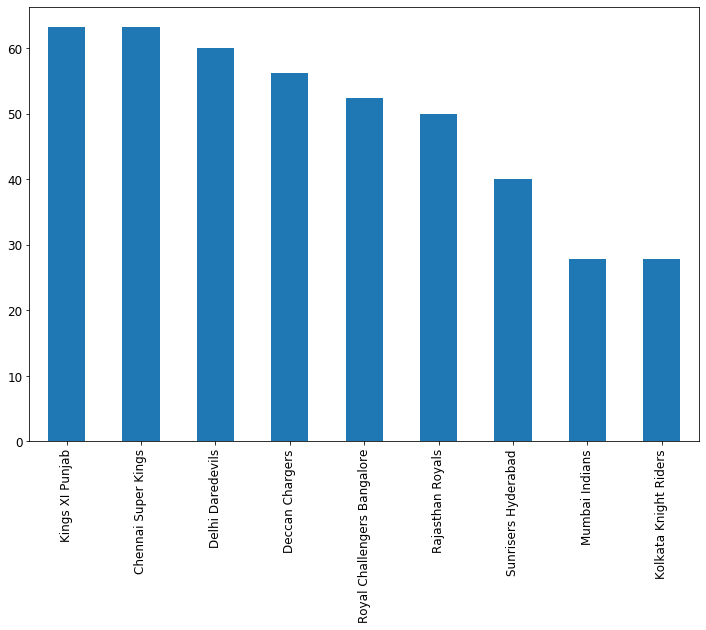

In [33]:
df_most_wins['wins_p'].sort_values(ascending=False).plot(kind='bar',
                                                        figsize=(12,8),
                                                        fontsize=12)
#plt.xlabel('Team')
#plt.ylabel('Winning Percentage')
#plt.title('Teams Overseas Winning Percentage')
#plt.savefig('team_overseas_winning_percentage.png')

print(df_most_wins['wins_p'].sort_values(ascending=False))

Observations:
    
    Kings XI Punjab and Chennai Super Kings have more winning percentage than other teams on overseas

### Top 5 Venues Batting First has an advantage 

Buffalo Park        66.666667
Kingsmead           60.000000
Newlands            57.142857
OUTsurance Oval     50.000000
St George's Park    42.857143
Name: venue, dtype: float64


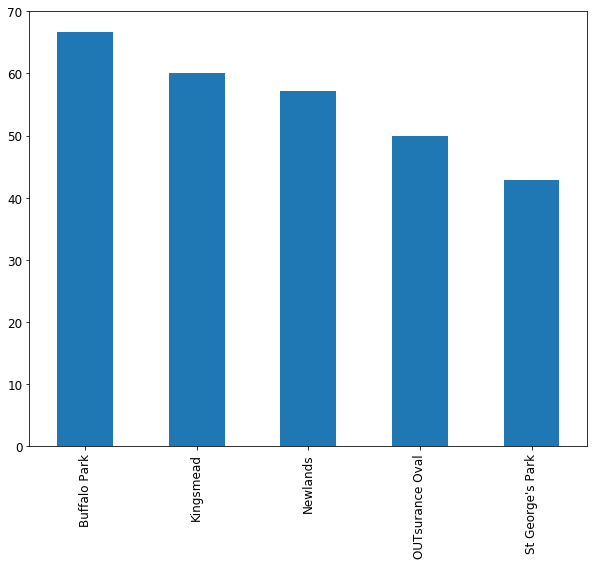

In [49]:
df_os_win_by_runs = df_os_stats[df_os_stats.win_by_runs > 0][['team1','team2','winner','venue','win_by_runs']]
df_os_stadium_p = (df_os_win_by_runs.venue.value_counts()/df_os_stats.venue.value_counts())*100
print(df_os_stadium_p.sort_values(ascending=False).head(5))
df_os_stadium_p.sort_values(ascending=False).head(5).plot(kind='bar',
                                                        figsize=(10,8),
                                                        fontsize=12)
#plt.xlabel('Venue')
#plt.ylabel('Winning Percentage')
#plt.title('Top 5 OverSeas Venues with Batting First Advantage')
#plt.savefig('overseas_venue_batting_first_advantage_top10.png')

### Top 5 Teams Batting First has an advantage  

Sunrisers Hyderabad      100.000000
Mumbai Indians            80.000000
Chennai Super Kings       66.666667
Kolkata Knight Riders     60.000000
Deccan Chargers           55.555556
Name: winner, dtype: float64


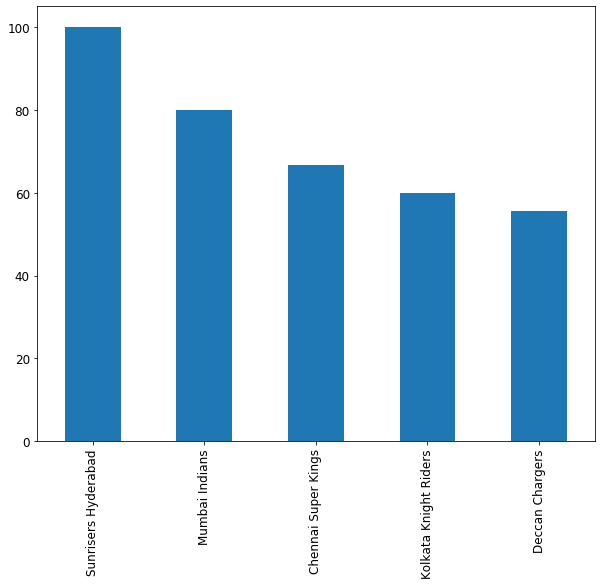

In [45]:
df_os_team_wbr_p = (df_os_win_by_runs.winner.value_counts()/df_os_stats.winner.value_counts())*100
print(df_os_team_wbr_p.sort_values(ascending=False).head(5))
df_os_team_wbr_p.sort_values(ascending=False).head(5).plot(kind='bar',
                                                        figsize=(10,8),
                                                        fontsize=12)

#plt.xlabel('Teams')
#plt.ylabel('Winning Percentage')
#plt.title('Top 5 Teams with Batting First Advantage on Overseas')
#plt.savefig('teams_batting_first_advantage_top10_overseas.png')

Observations:
    
    1. More Chances of winning the match by batting first at  Buffalo Park 
    2. Sunrisers Hyderabad Won all the matches whenever they batted first on overseas

### Top 5 Venues Batting Second has an advantage  

SuperSport Park            66.666667
Sharjah Cricket Stadium    66.666667
De Beers Diamond Oval      66.666667
New Wanderers Stadium      62.500000
St George's Park           57.142857
Name: venue, dtype: float64


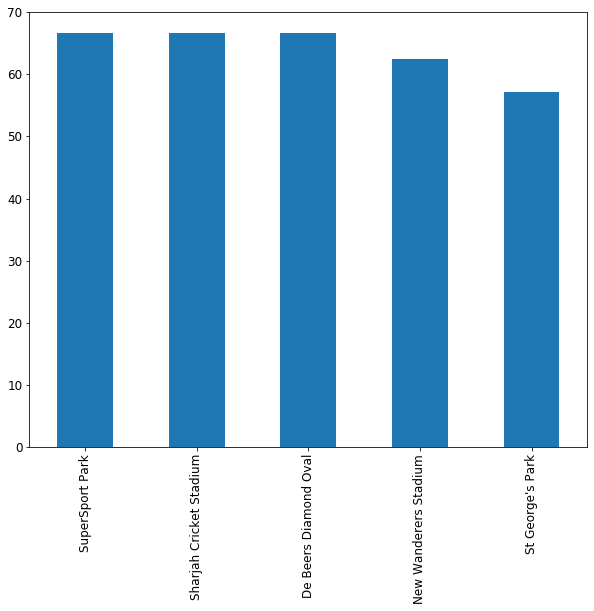

In [47]:
df_os_win_by_wkts = df_os_stats[df_os_stats.win_by_wickets > 0][['team1','team2','winner','venue','win_by_wickets']]
df_os_stadium_wkts_p = (df_os_win_by_wkts.venue.value_counts()/df_os_stats.venue.value_counts())*100
print(df_os_stadium_wkts_p.sort_values(ascending=False).head(5))
df_os_stadium_wkts_p.sort_values(ascending=False).head(5).plot(kind='bar',
                                                        figsize=(10,8),
                                                        fontsize=12)
#plt.xlabel('Venue')
#plt.ylabel('Winning Percentage')
#plt.title('Top 5 OverSeas Venues with Batting Second Advantage')
#plt.savefig('overseas_venue_batting_second_advantage_top10.png')

### ### Top 5 Teams Batting Second has an advantage   

Delhi Daredevils               75.000000
Royal Challengers Bangalore    72.727273
Kings XI Punjab                58.333333
Rajasthan Royals               55.555556
Deccan Chargers                44.444444
Name: winner, dtype: float64


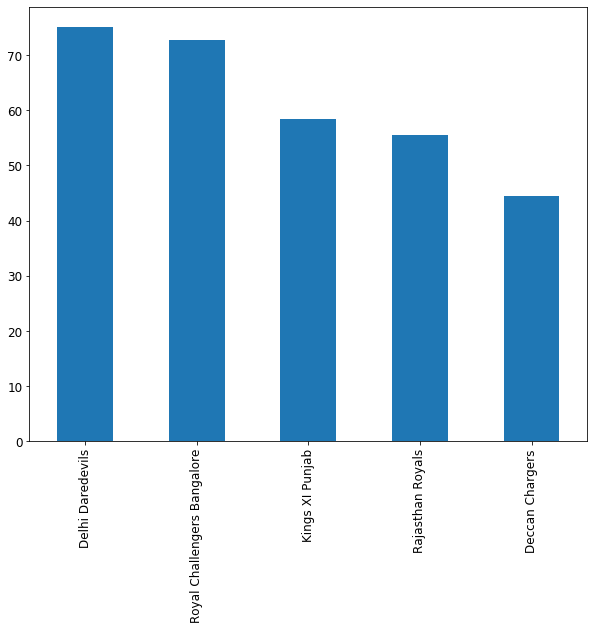

In [50]:
df_os_team_wbw_p = (df_os_win_by_wkts.winner.value_counts()/df_os_stats.winner.value_counts())*100
print(df_os_team_wbw_p.sort_values(ascending=False).head(5))
df_os_team_wbw_p.sort_values(ascending=False).head(5).plot(kind='bar',
                                                        figsize=(10,8),
                                                        fontsize=12)

#plt.xlabel('Teams')
#plt.ylabel('Winning Percentage')
#plt.title('Top 5 Teams with Batting Second Advantage on Overseas')
#plt.savefig('teams_batting_second_advantage_top10_overseas.png')

Observations:
    
    1. More Chances of winning the match by batting second at SuperSport Park , Sharjah Cricket Stadium ,De Beers Diamond Oval venues
    2. Delhi Daredevils Won More matches  on overseas whenever they batted second
